In [104]:
import os
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from IPython import display
from IPython.display import HTML
pd.set_option('mode.chained_assignment', None)
plt.rcParams["figure.figsize"] = (18, 12) # (w, h)



In [105]:
notboookname  = 'trend'
filename      = 'esea-1h.csv'
notebook_path = os.path.abspath(f"{notboookname}.ipynb")
csv_file      = os.path.join(os.path.dirname(notebook_path), '..', 'data', filename)
df            = pd.read_csv(csv_file,
                            parse_dates=[0],
                            index_col=[0],
                            date_parser=lambda x: pd.to_datetime(x, utc=True))

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2048 entries, 2023-01-03 14:30:00+00:00 to 2024-03-15 19:30:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2048 non-null   float64
 1   High       2048 non-null   float64
 2   Low        2048 non-null   float64
 3   Close      2048 non-null   float64
 4   Adj Close  2048 non-null   float64
 5   Volume     2048 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 112.0 KB


# source: https://www.youtube.com/watch?v=v3z3FuxLzjU

In [106]:
df.rename(columns={'Datetime':'open_time', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'}, inplace=True)
df['open_time'] = df.index
df.set_index('open_time', inplace=True)

# Take the rolling atr so the yazus doesn't shake too much
df['atr'] = ta.atr(high=df.high, low=df.low, close=df.close)
df['atr'] = df.atr.rolling(window=30).mean()

df

,open,high,low,close,Adj Close,Volume,atr
open_time,,,,,,,
2023-01-03 14:30:00+00:00,18.700001,18.980000,18.309999,18.309999,18.309999,18370,NaN
2023-01-03 15:30:00+00:00,18.375000,18.709999,18.375000,18.530001,18.530001,1286,NaN
2023-01-03 16:30:00+00:00,18.639999,18.740000,18.560301,18.700001,18.700001,2350,NaN
2023-01-03 17:30:00+00:00,18.556299,18.700001,18.520000,18.680000,18.680000,1051,NaN
2023-01-03 18:30:00+00:00,18.629999,18.650000,18.500000,18.504999,18.504999,1038,NaN
...,...,...,...,...,...,...,...
2024-03-15 15:30:00+00:00,35.279999,35.279999,34.900002,35.075001,35.075001,3394,0.536934
2024-03-15 16:30:00+00:00,34.923199,35.000000,34.500000,34.880001,34.880001,4797,0.535734
2024-03-15 17:30:00+00:00,34.865002,34.865002,34.685001,34.685001,34.685001,388,0.533474


In [107]:
# from datetime import date, timedelta

# today = date.today()
# start = today - timedelta(days=today.weekday())
# end = start + timedelta(days=6)

# print(f"start: {start} | end: {end}")
# !pip3 install pendulum

import pendulum

today = pendulum.now()
start = today.start_of('month')
end = today.end_of('month')

df2 = df[df.index > start]

df2

,open,high,low,close,Adj Close,Volume,atr
open_time,,,,,,,
2024-03-01 14:30:00+00:00,38.799999,39.580002,38.145000,38.830002,38.830002,10314,0.839361
2024-03-01 15:30:00+00:00,38.500000,38.945000,38.209999,38.945000,38.945000,13884,0.843890
2024-03-01 16:30:00+00:00,38.930000,39.150002,38.680000,38.849998,38.849998,15838,0.842214
2024-03-01 17:30:00+00:00,38.889999,39.500000,38.860001,39.215000,39.215000,5100,0.839230
2024-03-01 18:30:00+00:00,39.490002,39.667099,39.360001,39.455101,39.455101,4192,0.834238
...,...,...,...,...,...,...,...
2024-03-15 15:30:00+00:00,35.279999,35.279999,34.900002,35.075001,35.075001,3394,0.536934
2024-03-15 16:30:00+00:00,34.923199,35.000000,34.500000,34.880001,34.880001,4797,0.535734
2024-03-15 17:30:00+00:00,34.865002,34.865002,34.685001,34.685001,34.685001,388,0.533474


# Detecting Extrema

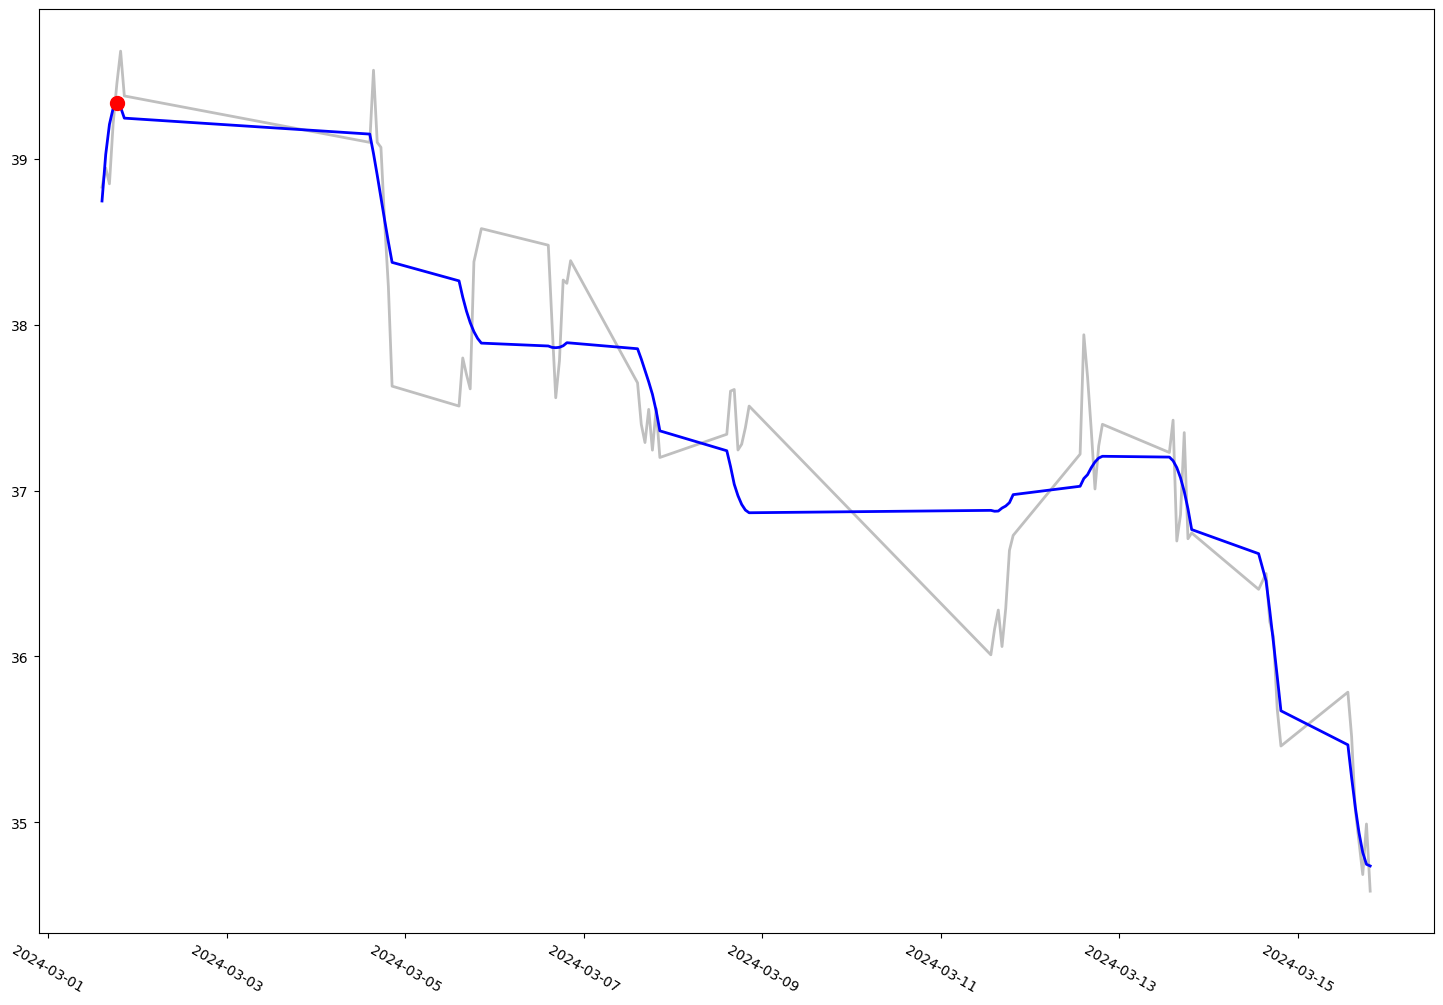

In [108]:
df2 = df[df.index > start] # df.iloc[0:500]

df2['close_smooth'] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df2.index, df2.close_smooth, c='b', lw=2, zorder=5)

atr = df2.atr.iloc[-1] # all the first atrs are NaN

peaks_idx, _ = find_peaks(df2.close_smooth, distance=15, width=3, prominence=atr)
troughs_idx, _ = find_peaks(-1*df2.close_smooth, distance=15, width=3, prominence=atr)

peaks, = ax.plot(df2.index[peaks_idx], df2.close_smooth.iloc[peaks_idx], c='r', linestyle='None', markersize=10.0, marker='o', zorder=10)
troughs, = ax.plot(df2.index[troughs_idx], df2.close_smooth.iloc[troughs_idx], c='g', linestyle='None', markersize=10.0, marker='o', zorder=10)

plt.show()

0
0


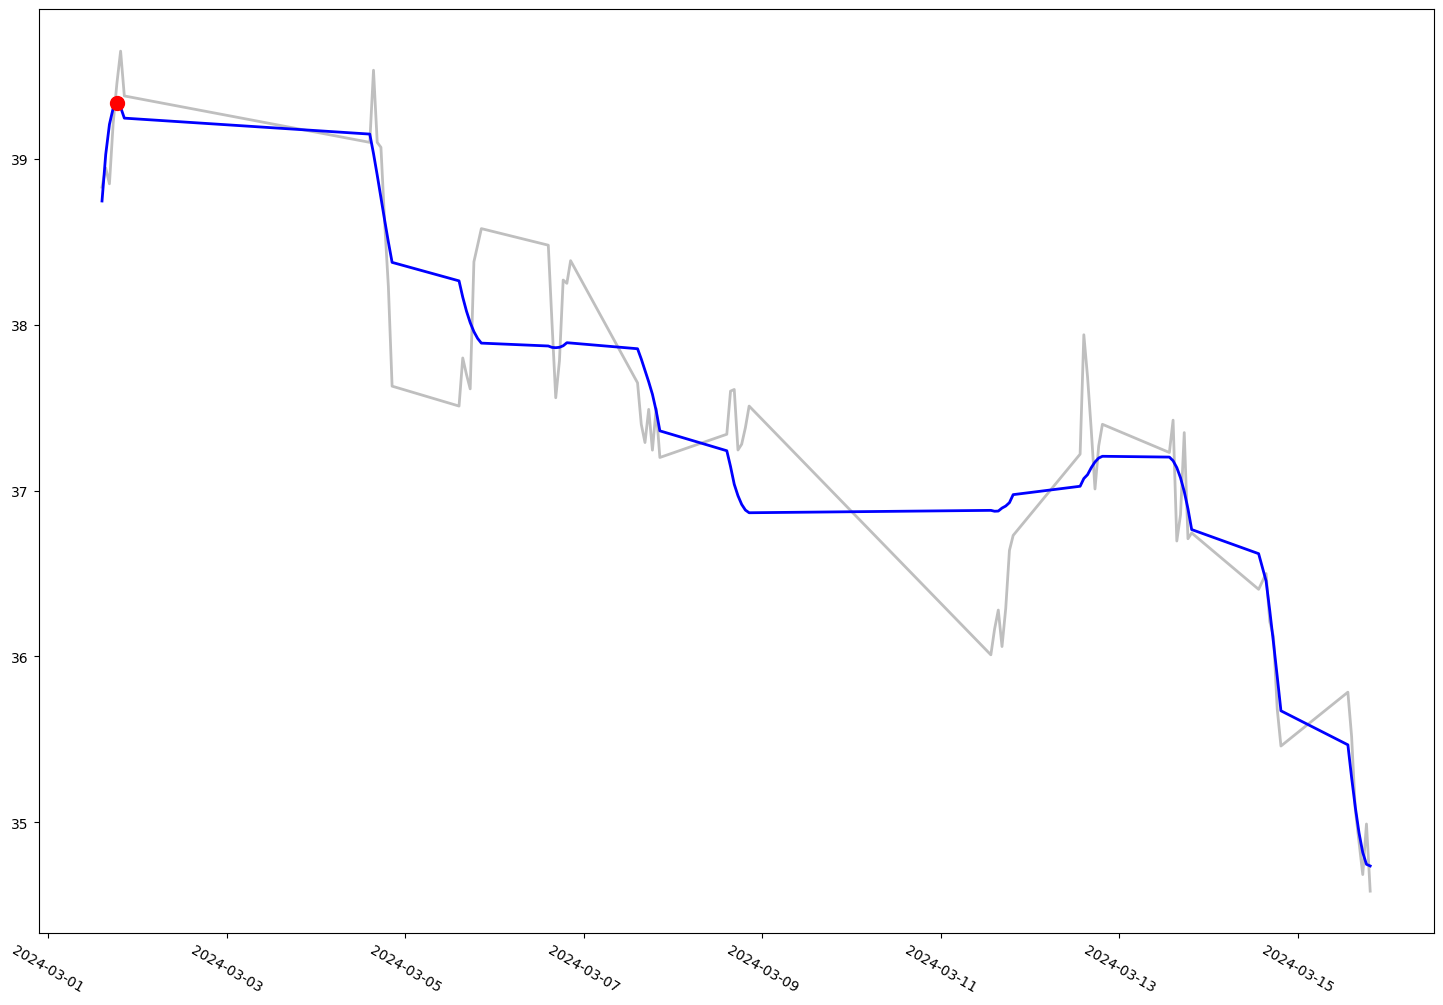

In [110]:
df2 = df[df.index > start] # df.iloc[0:500] #df.iloc[-200:]

df2['close_smooth'] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df2.index, df2.close_smooth, c='b', lw=2, zorder=5)

atr = df2.atr.iloc[-1] # all the first atrs are NaN

peaks_idx, _ = find_peaks(df2.close_smooth, distance=15, width=3, prominence=atr)
troughs_idx, _ = find_peaks(-1*df2.close_smooth, distance=15, width=3, prominence=atr)

peaks, = ax.plot(df2.index[peaks_idx], df2.close_smooth.iloc[peaks_idx], c='r', linestyle='None', markersize=10.0, marker='o', zorder=10)
troughs, = ax.plot(df2.index[troughs_idx], df2.close_smooth.iloc[troughs_idx], c='g', linestyle='None', markersize=10.0, marker='o', zorder=10)

up_run_length = 0
up_run = True
while up_run:
  if 2 + up_run_length > len(peaks_idx) or 2 + up_run_length > len(troughs_idx):
    break
  if df2.close_smooth.iloc[peaks_idx[-1 - up_run_length]] > df2.close_smooth.iloc[peaks_idx[-2 - up_run_length]] and \
     df2.close_smooth.iloc[troughs_idx[-1 - up_run_length]] > df2.close_smooth.iloc[troughs_idx[-2 - up_run_length]]:
    up_run_length += 1
  else:
    up_run = False

down_run_length = 0
down_run = True
while down_run:
  if 2 + down_run_length > len(peaks_idx) or 2 + down_run_length > len(troughs_idx):
    break
  if df2.close_smooth.iloc[peaks_idx[-1 - down_run_length]] < df2.close_smooth.iloc[peaks_idx[-2 - down_run_length]] and \
     df2.close_smooth.iloc[troughs_idx[-1 - down_run_length]] < df2.close_smooth.iloc[troughs_idx[-2 - down_run_length]]:
    down_run_length += 1
  else:
    down_run = False

if up_run_length > 0:
  ax.set_facecolor('#adf7b6')
elif down_run_length > 0:
  ax.set_facecolor('#ffc09f')
else:
  ax.set_facecolor('white')

print(up_run_length)
print(down_run_length)

plt.show()

# Finding runs